In [1]:
from scipy import stats 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import dateutil 
import statistics 
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score, accuracy_score

data = pd.read_csv('screening_exercise_orders_v201810.csv')
# computing most_recent_order_date
customer_recentorder = data.groupby(['customer_id','gender'], sort=False)['date'].max()
# converting series to dataframe and resetting index
customer_recentorder_df = customer_recentorder.to_frame().reset_index()
# renaming column names
customer_recentorder_df.columns = ['customer_id','gender','most_recent_order_date']
# couting orders placed by the customer
order_count = data['customer_id'].value_counts()
# converting series to dataframe and resetting index
order_count_df = order_count.to_frame().reset_index()
# renaming column names
order_count_df.columns = ['customer_id','order_count']
# Joining order_count dataframe with customer_recentorder dataframe 
customer_dataframe = customer_recentorder_df.set_index('customer_id').join(order_count_df.set_index('customer_id'))
print(customer_dataframe)

             gender most_recent_order_date  order_count
customer_id                                            
1000              0    2017-01-01 00:11:31            1
1001              0    2017-01-01 00:29:56            1
1002              1    2017-02-19 21:35:31            3
1003              1    2017-04-26 02:37:20            4
1004              0    2017-01-01 03:11:54            1
...             ...                    ...          ...
9809              1    2017-12-31 21:39:33            1
9810              1    2017-12-31 22:16:20            1
9811              1    2017-12-31 22:24:06            1
9812              0    2017-12-31 23:01:10            1
9813              0    2017-12-31 23:11:02            1

[8814 rows x 3 columns]


Populating the interactive namespace from numpy and matplotlib
Assumption: Week 1 begins on January 1, regardless of what day of the week that might be


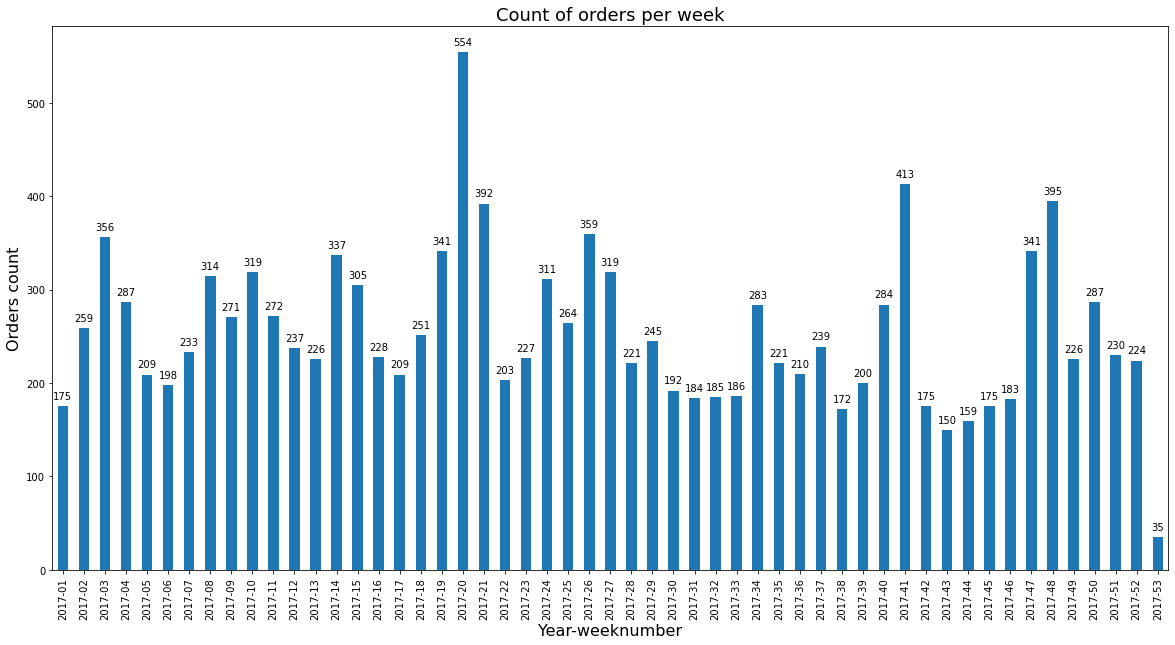

In [2]:
#resizing image size
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

print("Assumption: Week 1 begins on January 1, regardless of what day of the week that might be")

data['date'] = pd.to_datetime(data['date'])

# converting date to Year_week_number
data['Year_Week_Number'] = data.date.dt.strftime('%Y-%U')
# computing orders count per week
Orders_count_week = data.groupby(['Year_Week_Number'])['value'].count()
# renaming columns
Orders_count_week.columns = ['Year_Week_Number','Orders per Week']
# plotting bar graph
ax = Orders_count_week.plot.bar()
# annotate bars with values 
for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.title('Count of orders per week',fontsize=18)
plt.ylabel('Orders count',fontsize=16)
plt.xlabel('Year-weeknumber',fontsize=16)
plt.show()

In [3]:
print("""
Mean order value for gender 0 and for gender 1:
----------------------------------------------""")

# computing mean of gender0
gender0_mean = data.groupby('gender')['value'].mean()[0]

print(" -> mean order value of gender0 is " + str(round(gender0_mean,2)))
print("\n")

# computing mean of gender1
gender1_mean = data.groupby('gender')['value'].mean()[1]
print(" -> mean order value of gender1 is " + str(round(gender1_mean,2)))

print("""
Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------""")
# sample size
N = (data['customer_id'].count())/2

                                                     
print("Performing a 2 sample t-test to test whether mean order value of gender 1 in the dataset is different from gender 0")
print("\n")
print("Null Hypothesis : Mean order values of gender 0 and gender 1 are the same")
print("\n")
print("Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different")
print("\n")

# computing variance of gender0
gender0_var = data.groupby('gender')['value'].var(ddof=1)[0]

# computing variance of gender1
gender1_var = data.groupby('gender')['value'].var(ddof=1)[1]

# computing standard deviation
s = np.sqrt((gender0_var + gender1_var)/2)

# computing t-statistics
t = (gender0_mean - gender1_mean)/(s*np.sqrt(2/N))
print(" -> t value is " + str(round(t,4)))
print("\n")

## Compare with the critical t-value
# Degrees of freedom
df = 2*N - 2

# p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

# multiply p value with 2 because its a two tail t-test
p_new = round(2*p,4)

print(" -> p value is " + str(p_new))
print("\n")

if ( p_new < 0.05 ):
    print("""we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different and statistically significant" """)
else:
    print("""we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of """ +  str(round(2*p,4))  + """ and thus we accept the null hypothesis and thus it proves that the "mean order value of the two genders are same" """)


Mean order value for gender 0 and for gender 1:
----------------------------------------------
 -> mean order value of gender0 is 363.89


 -> mean order value of gender1 is 350.71

Check whether difference between genders mean order value is significant:
-------------------------------------------------------------------------
Performing a 2 sample t-test to test whether mean order value of gender 1 in the dataset is different from gender 0


Null Hypothesis : Mean order values of gender 0 and gender 1 are the same


Alternate Hypothesis : Mean order values of gender 0 and gender 1 are the different


 -> t value is 1.976


 -> p value is 0.0482


we can infer from above that after comparing the t statistic with the critical t value  we get a good p value of 0.0482 and thus we reject the null hypothesis and thus it proves that the "mean order value of the two genders are different and statistically significant" 


True Negatives: 2189 
False Positives/Type-I error: 2218 
False Negatives/Type-II error:  895 
True Positives:  3512
Frequency of gender 0:  4407
Frequency of gender 1:  4407
Null Error Rate: 50.0 %
Accuracy: 64.68 %
Classification Error: 35.32 %
Recall/Sensitivity: 79.7 %
Specificity: 49.7 %
False Positive Rate: 50.33 %
Precision: 61.29 %
Prevalence: 50.0 %
Cohen Kappa Score: 0.5
Area under the ROC curve: 0.6468


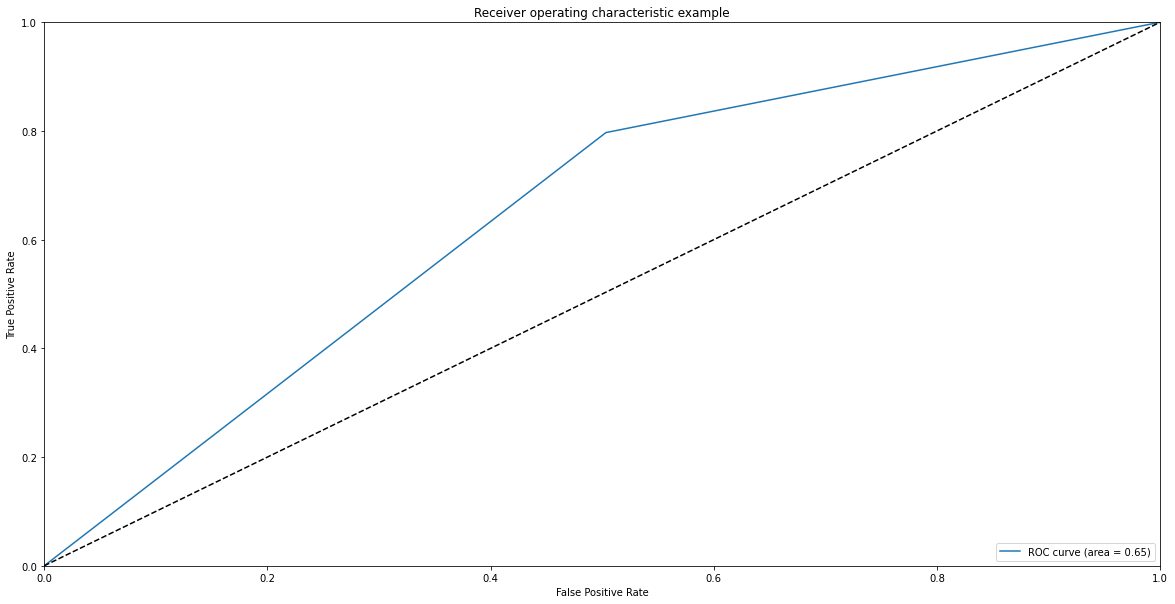

In [4]:
predictions_df = data.groupby(['customer_id','gender','predicted_gender']).agg(order_count = ('customer_id', 'count')).reset_index()
original_gender = predictions_df['gender'].to_numpy()
predicted_gender = predictions_df['predicted_gender'].to_numpy() 
TN, FP, FN, TP=confusion_matrix(original_gender, predicted_gender).ravel()

print('True Negatives:',TN,'\nFalse Positives/Type-I error:', FP, '\nFalse Negatives/Type-II error: ', FN,'\nTrue Positives: ', TP)
total = TP+TN+FP+FN

(unique, counts) = np.unique(original_gender, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Frequency of gender 0: ', frequencies[0][1])
print('Frequency of gender 1: ', frequencies[1][1])

null_error_rate = (TN+FP)/ float(total)
print('Null Error Rate:',round(null_error_rate, 4)*100 , '%')

accuracy = (TP+TN)/float(total)
print('Accuracy:', round(accuracy, 4)*100 , '%')

classification_error = (FP + FN) / float(total)
print('Classification Error:', round(classification_error, 4)*100 , '%')

sensitivity = TP / float(FN + TP)
print('Recall/Sensitivity:',round(sensitivity, 3)*100 , '%')

specificity = TN / float(TN + FP)
print('Specificity:',round(specificity, 3)*100 , '%')

false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:',round(false_positive_rate, 4)*100 , '%')

precision = TP / float(TP + FP)
print('Precision:',round(precision, 4)*100 , '%')

prevalence = (FN+TP) / float(total)
print('Prevalence:',round(prevalence, 4)*100 , '%')

kappa_score = cohen_kappa_score(original_gender, predicted_gender)
print('Cohen Kappa Score:',round(prevalence, 4))

fpr, tpr, thresholds =roc_curve(original_gender, predicted_gender, pos_label=1)
area =roc_auc_score(original_gender, predicted_gender)
print('Area under the ROC curve:',round(area, 4))

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [5]:
print("I have used Google Colab and AWS for machine learning and deep learning projects. Google Colab offers GPU" +
      " based instances free for training the models. AWS offers runtime environments to deploy these algorithms" + 
      " I have used recently used Amazon EKS-optimized AMI with GPU support for deploying deep learning algorithms." +
      " Using a GPU support based cluster reduced the inference time for deployed deep learning algorithms to milliseconds.")

I have used Google Colab and AWS for machine learning and deep learning projects. Google Colab offers GPU based instances free for training the models. AWS offers runtime environments to deploy these algorithms I have used recently used Amazon EKS-optimized AMI with GPU support for deploying deep learning algorithms. Using a GPU support based cluster reduced the inference time for deployed deep learning algorithms to milliseconds.
